<a href="https://colab.research.google.com/github/johanjun/dacon_molit/blob/main/%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re
import shutil
import random
import missingno as msno
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/dacon_molit/data/'

### 교통사고
- 좌표계 EPSG:5178 → UTM-K (Bessel)

In [3]:
df_acci = pd.read_csv(data_dir+'도로교통공단_사망 교통사고 정보_20201231.csv', encoding='euc-kr')

In [4]:
df_acci.shape

(2983, 23)

In [5]:
df_acci.head(3)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560
2,2020,2020-01-01 07,주,수,1,0,0,0,0,충남,천안시,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,967688.0,1869920.0,127.137666,36.826933


In [6]:
df_seoul = df_acci[df_acci['발생지시도'] == '서울']
df_seoul['발생지시도'].unique()

array(['서울'], dtype=object)

In [10]:
df_seoul.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

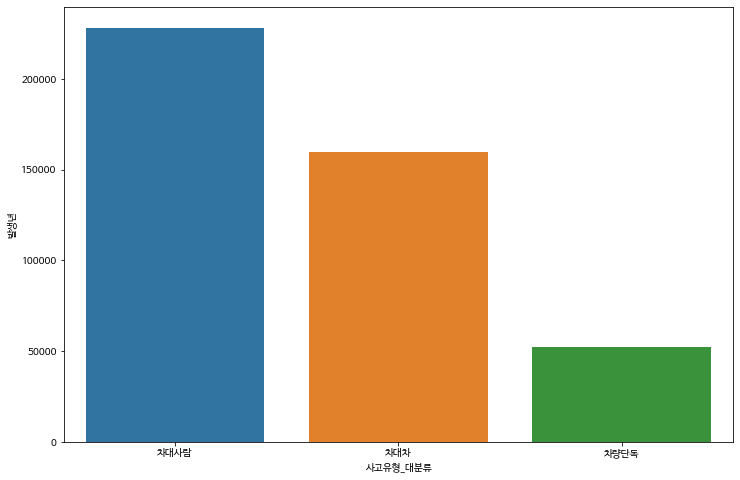

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_seoul.groupby('사고유형_대분류')['발생년'].sum().index, y=df_seoul.groupby('사고유형_대분류')['발생년'].sum())
plt.show()

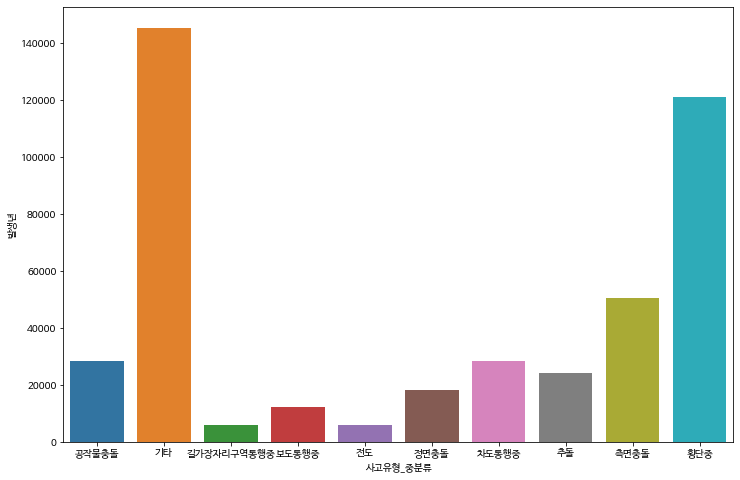

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_seoul.groupby('사고유형_중분류')['발생년'].sum().index, y=df_seoul.groupby('사고유형_중분류')['발생년'].sum())
plt.show()

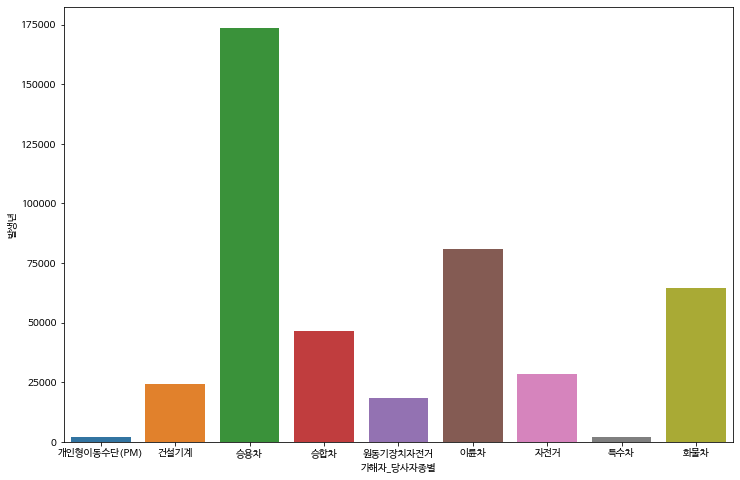

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_seoul.groupby('가해자_당사자종별')['발생년'].sum().index, y=df_seoul.groupby('가해자_당사자종별')['발생년'].sum())
plt.show()

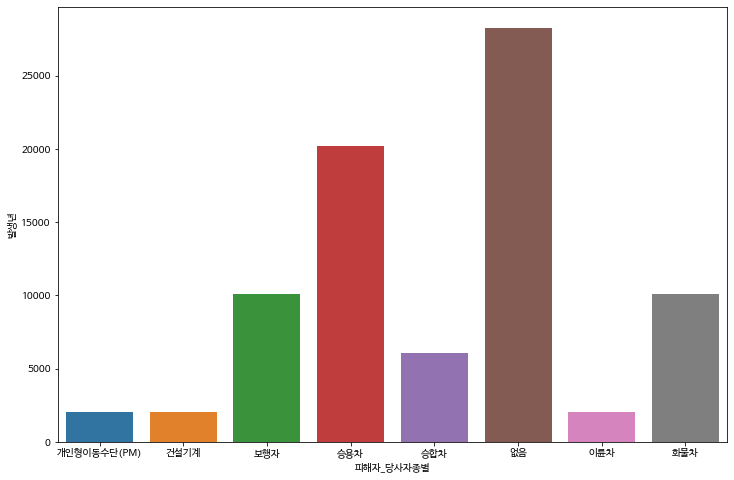

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_seoul[df_seoul['가해자_당사자종별']=='이륜차'].groupby('피해자_당사자종별')['발생년'].sum().index, y=df_seoul[df_seoul['가해자_당사자종별']=='이륜차'].groupby('피해자_당사자종별')['발생년'].sum())
plt.show()

In [54]:
df_acci['datetime'] = pd.to_datetime([x.split(" ")[0] for x in df_acci['발생년월일시']])
df_acci.head(3)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,datetime
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761,2020-01-01
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560,2020-01-01
2,2020,2020-01-01 07,주,수,1,0,0,0,0,충남,천안시,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,967688.0,1869920.0,127.137666,36.826933,2020-01-01


In [55]:
df_acci['month'] = [x.month for x in df_acci.datetime]
df_acci.head(3)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,datetime,month
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761,2020-01-01,1
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560,2020-01-01,1
2,2020,2020-01-01 07,주,수,1,0,0,0,0,충남,천안시,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,967688.0,1869920.0,127.137666,36.826933,2020-01-01,1


In [56]:
df_acci[df_acci['가해자_당사자종별']=='이륜차'].shape

(432, 25)

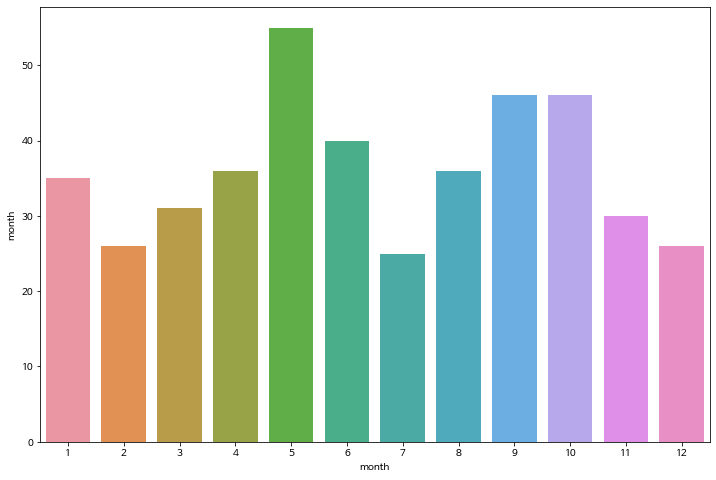

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_acci[df_acci['가해자_당사자종별']=='이륜차'].groupby('month')['month'].count().index, y=df_acci[df_acci['가해자_당사자종별']=='이륜차'].groupby('month')['month'].count())
plt.show()

In [141]:
df_acci2019 = pd.read_csv(data_dir+'도로교통공단_사망교통사고정보(2019).csv', encoding='euc-kr')
df_acci2019.shape

(3233, 23)

In [142]:
df_acci = pd.read_csv(data_dir+'도로교통공단_사망 교통사고 정보_20201231.csv', encoding='euc-kr')

In [143]:
df_acci = pd.concat([df_acci, df_acci2019], ignore_index=True)
df_acci.shape

(6216, 23)

In [144]:
df_acci['datetime'] = pd.Series([x.split(" ")[0] for x in df_acci['발생년월일시']], index=df_acci.index)

In [145]:
df_acci.shape

(6216, 24)

In [173]:
df_acci.describe()

,발생년,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
count,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6.216000e+03,6.216000e+03,6216.000000,6216.000000
mean,2019.479891,1.034427,0.536197,0.213803,0.285071,0.037323,1.005456e+06,1.818580e+06,127.558158,36.361523
std,0.499636,0.224283,1.718662,0.735586,1.106614,0.379130,7.678121e+04,1.179693e+05,0.851996,1.064606
min,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.551000e+05,1.470790e+06,124.717593,33.222138
25%,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.459448e+05,1.724816e+06,126.897313,35.515505
50%,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.759160e+05,1.825041e+06,127.230159,36.420036
75%,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.071914e+06,1.930338e+06,128.305186,37.370871
max,2020.000000,6.000000,34.000000,17.000000,26.000000,15.000000,1.296158e+06,2.048977e+06,130.848830,38.437576


In [148]:
df_acci.head(2)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,datetime
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761,2020-01-01
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560,2020-01-01


In [ ]:
import datetime
df_acci['year_month'] = [(x.split('-')[0]+'-'+x.split('-')[1]) for x in df_acci['datetime']]
df_acci.head(3)

In [153]:
df_2wheel = df_acci[df_acci['가해자_당사자종별']=='이륜차']

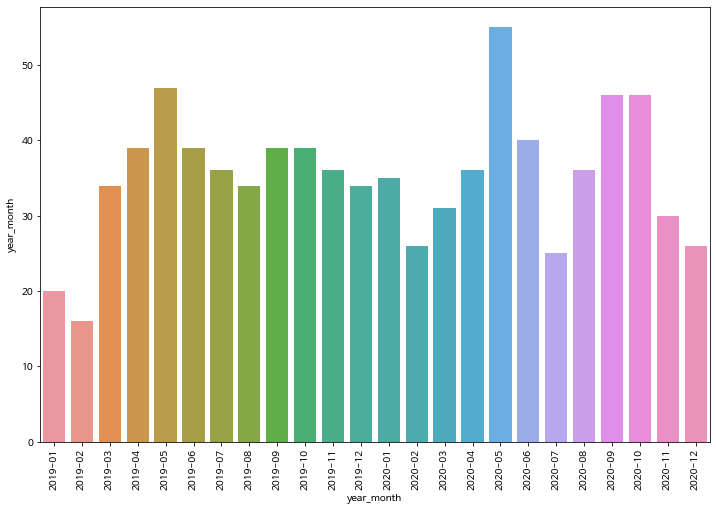

In [156]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_acci[df_acci['가해자_당사자종별']=='이륜차'].groupby('year_month')['year_month'].count().index,
            y=df_acci[df_acci['가해자_당사자종별']=='이륜차'].groupby('year_month')['year_month'].count())
plt.xticks(rotation=90)
plt.show()

In [179]:
df_seoul = df_acci[df_acci['발생지시도'] == '서울']

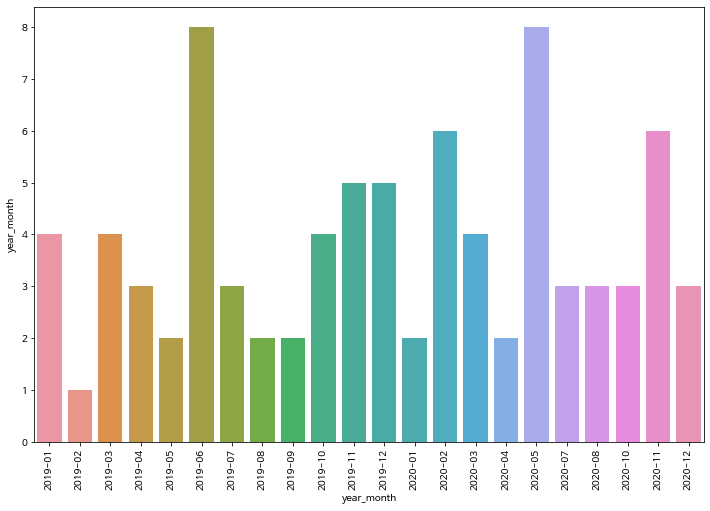

In [181]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_seoul[df_seoul['가해자_당사자종별']=='이륜차'].groupby('year_month')['year_month'].count().index,
            y=df_seoul[df_seoul['가해자_당사자종별']=='이륜차'].groupby('year_month')['year_month'].count())
plt.xticks(rotation=90)
plt.show()

In [159]:
df_2wheel.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', 'datetime', 'year_month'],
      dtype='object')

In [160]:
df_2wheel['사고유형_대분류'].unique()

array(['차대차', '차량단독', '차대사람', '철길건널목'], dtype=object)

In [182]:
df_2wheel['사고유형_중분류'].unique()

array(['기타', '측면충돌', '정면충돌', '공작물충돌', '추돌', '전도', '전복', '횡단중', '도로이탈',
       '보도통행중', '차도통행중', '철길건널목', '주/정차차량 충돌'], dtype=object)

In [184]:
df_2wheel['가해자법규위반'].unique()

array(['안전운전 의무 불이행', '신호위반', '안전거리 미확보', '교차로 통행방법 위반', '기타', '과속',
       '중앙선 침범', '보행자 보호의무 위반'], dtype=object)

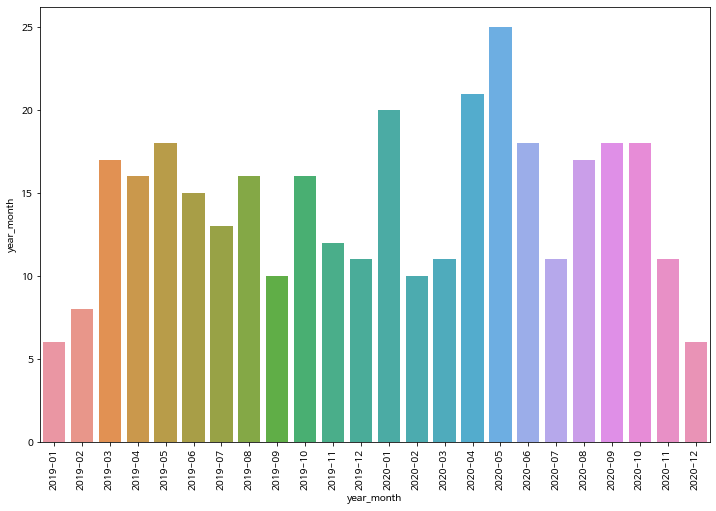

In [162]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_2wheel[df_2wheel['사고유형_대분류']=='차량단독'].groupby('year_month')['year_month'].count().index,
            y=df_2wheel[df_2wheel['사고유형_대분류']=='차량단독'].groupby('year_month')['year_month'].count())
plt.xticks(rotation=90)
plt.show()

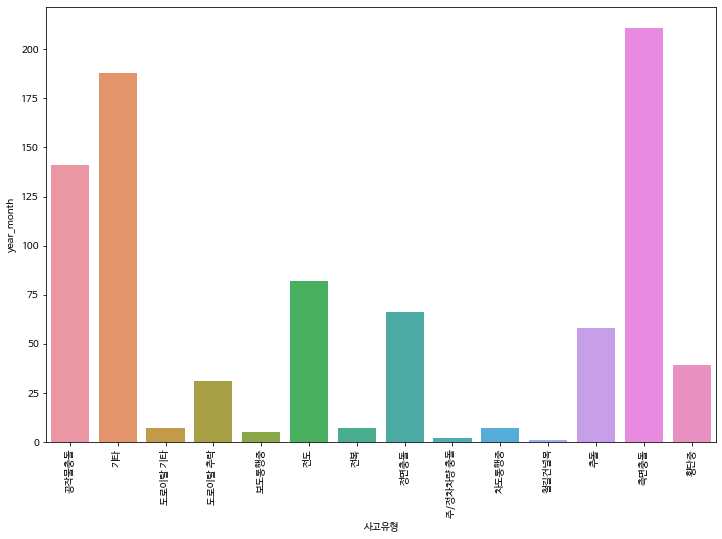

In [172]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_2wheel.groupby('사고유형')['year_month'].count().index, y=df_2wheel.groupby('사고유형')['year_month'].count())
plt.xticks(rotation=90)
plt.show()

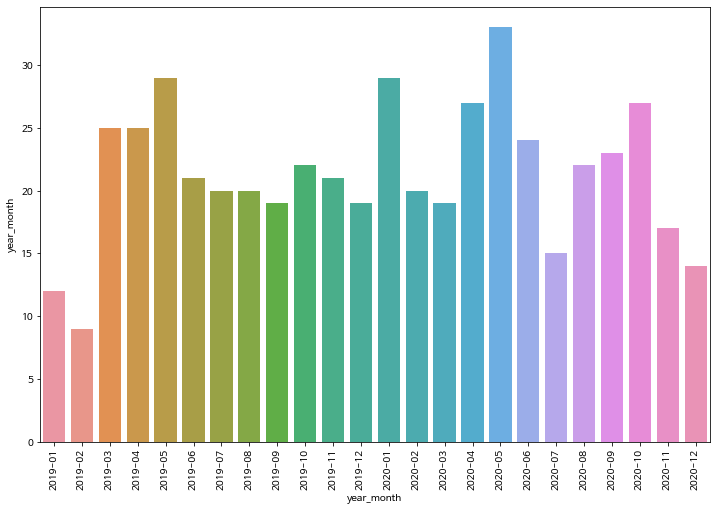

In [178]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_2wheel[df_2wheel['가해자법규위반']=='안전운전 의무 불이행'].groupby('year_month')['year_month'].count().index,
            y=df_2wheel[df_2wheel['가해자법규위반']=='안전운전 의무 불이행'].groupby('year_month')['year_month'].count())
plt.xticks(rotation=90)
plt.show()

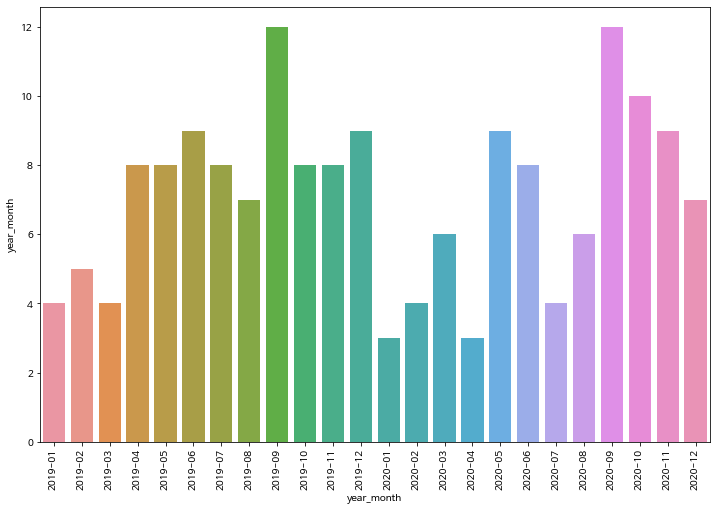

In [176]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_2wheel[df_2wheel['가해자법규위반']=='신호위반'].groupby('year_month')['year_month'].count().index,
            y=df_2wheel[df_2wheel['가해자법규위반']=='신호위반'].groupby('year_month')['year_month'].count())
plt.xticks(rotation=90)
plt.show()

In [195]:
import folium

In [25]:
# 새로운 지도 객체 생성
new_map = folium.Map(location=[37.5642135, 127.0016985], zoom_start=12, tiles='Stamen Toner')

df_mapping = df_seoul.sample(10)
# 마커 
for i, m in df_mapping.iterrows():
  marker = folium.Marker(location=[m['위도'], m['경도']],
                         popup = m['발생지시군구'])
  marker.add_to(new_map)
 
new_map

In [197]:
!pip install fiona
!pip install geopandas
!pip install shapely

     |████████████████████████████████| 15.4 MB 80 kB/s 
     |████████████████████████████████| 994 kB 11.7 MB/s 
     |████████████████████████████████| 6.6 MB 28.7 MB/s 


In [198]:
from fiona.crs import from_string
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

In [200]:
df_seoul['geometry'] = df_seoul.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
df_seoul = gpd.GeoDataFrame(df_seoul, geometry='geometry')

df_acci['geometry'] = df_acci.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
df_acci = gpd.GeoDataFrame(df_acci, geometry='geometry')

In [52]:
df_seoul.head(3)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,geometry
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761,POINT (37.487 127.047)
32,2020,2020-01-04 06,주,토,1,0,0,0,0,서울,동대문구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,961691.8,1951718.4,127.066231,37.564030,POINT (37.564 127.066)
48,2020,2020-01-06 10,주,월,1,0,0,0,0,서울,강서구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로횡단보도내,화물차,보행자,939680.9,1952886.5,126.816916,37.573379,POINT (37.573 126.817)


In [201]:
epsg5178 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")

In [203]:
df_seoul.crs = epsg5178
df_acci.crs = epsg5178
print(df_seoul.crs)

+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs +type=crs


In [33]:
# epsg4326 = from_string("proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [35]:
# df_acci = df_acci.to_crs(epsg4326)

In [55]:
from folium import plugins
new_map = folium.Map(location=[37.5642135, 127.0016985], zoom_start=12, tiles='Cartodb dark_matter')

heat_data = [[point.xy[0][0], point.xy[1][0]] for point in df_seoul['geometry']]
plugins.HeatMap(heat_data).add_to(new_map)
 
new_map


In [205]:
from folium import plugins
new_map = folium.Map(location=[37.5642135, 127.0016985], zoom_start=12, tiles='Cartodb dark_matter')

heat_data = [[point.xy[0][0], point.xy[1][0]] for point in df_acci[df_acci['가해자_당사자종별']=='이륜차']['geometry']]
plugins.HeatMap(heat_data).add_to(new_map)
 
new_map


In [215]:
df_2wheel_TAAS = pd.read_csv(data_dir+'accidentInfoList.xls.csv')
print(df_2wheel_TAAS.shape)
df_2wheel_TAAS.head()

(9327, 22)


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2.019010e+15,2019년 1월 1일 00시,화요일,서울특별시 구로구 고척동,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,23세,상해없음,승용,남,71세,경상
1,2.019010e+15,2019년 1월 1일 13시,화요일,서울특별시 서대문구 북아현동,경상사고,0,0,1,0,차대사람 - 횡단중,보행자보호의무위반,포장 - 건조,맑음,단일로 - 기타,이륜,남,22세,상해없음,보행자,여,63세,경상
2,2.019010e+15,2019년 1월 1일 17시,화요일,서울특별시 중랑구 상봉동,경상사고,0,0,1,0,차대차 - 기타,신호위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,21세,경상,승합,남,46세,상해없음
3,2.019010e+15,2019년 1월 1일 18시,화요일,서울특별시 구로구 천왕동,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 젖음/습기,맑음,교차로 - 교차로안,이륜,남,22세,경상,이륜,남,37세,상해없음
4,2.019010e+15,2019년 1월 1일 20시,화요일,서울특별시 동대문구 휘경동,경상사고,0,0,1,0,차대차 - 측면충돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,원동기,남,47세,경상,승용,남,53세,상해없음


- 「자동차관리법」에서는 오토바이를 이륜자동차라 부르고 있습니다. 오토바이 중 배기량이 125cc 이하인 오토바이를 「도로교통법」에서는 원동기장치자전거라 부르고 있습니다.

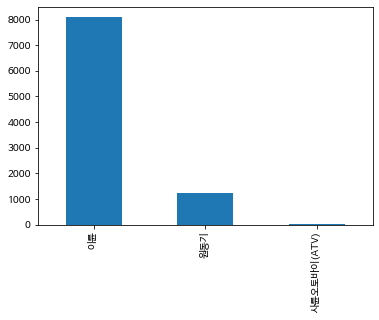

In [226]:
df_2wheel_TAAS['가해운전자 차종'].value_counts().plot(kind='bar')

In [216]:
df_2wheel_TAAS['시군구'].unique()

array(['서울특별시 구로구 고척동', '서울특별시 서대문구 북아현동', '서울특별시 중랑구 상봉동',
       '서울특별시 구로구 천왕동', '서울특별시 동대문구 휘경동', '서울특별시 마포구 도화동',
       '서울특별시 동작구 상도1동', '서울특별시 구로구 오류동', '서울특별시 서초구 서초동',
       '서울특별시 강남구 수서동', '서울특별시 강서구 화곡동', '서울특별시 노원구 하계동', '서울특별시 노원구 상계동',
       '서울특별시 마포구 연남동', '서울특별시 마포구 성산동', '서울특별시 구로구 구로동', '서울특별시 중랑구 면목동',
       '서울특별시 중구 신당동', '서울특별시 양천구 목동', '서울특별시 관악구 신림동', '서울특별시 동대문구 장안동',
       '서울특별시 은평구 수색동', '서울특별시 동작구 상도동', '서울특별시 마포구 용강동',
       '서울특별시 종로구 종로5가', '서울특별시 송파구 방이동', '서울특별시 용산구 용문동',
       '서울특별시 노원구 공릉동', '서울특별시 서대문구 냉천동', '서울특별시 서대문구 홍은동',
       '서울특별시 강북구 미아동', '서울특별시 동대문구 청량리동', '서울특별시 관악구 봉천동',
       '서울특별시 강동구 천호동', '서울특별시 송파구 가락동', '서울특별시 동작구 사당동', '서울특별시 도봉구 창동',
       '서울특별시 강남구 역삼동', '서울특별시 양천구 신정동', '서울특별시 강남구 개포동',
       '서울특별시 성북구 동소문동2가', '서울특별시 마포구 마포동', '서울특별시 종로구 명륜4가',
       '서울특별시 강남구 청담동', '서울특별시 중랑구 중화동', '서울특별시 서초구 양재동',
       '서울특별시 용산구 원효로1가', '서울특별시 영등포구 문래동6가', '서울특별시 성동구 홍익동',
       '서울특별시 강서구 마곡동', '서울특별시 동대문구 회기동', '서울특